In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools
import matplotlib.pyplot as plt

In [55]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [56]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [57]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [58]:
#independent variable
X = train.drop(['label'],axis=1)
X

,id,tweet
0,1,@user when a father is dysfunctional and is s...
1,2,@user @user thanks for #lyft credit i can't us...
2,3,bihday your majesty
3,4,#model i love u take with u all the time in ...
4,5,factsguide: society now #motivation
...,...,...
31957,31958,ate @user isz that youuu?ðððððð...
31958,31959,to see nina turner on the airwaves trying to...
31959,31960,listening to sad songs on a monday morning otw...
31960,31961,"@user #sikh #temple vandalised in in #calgary,..."


In [59]:
#dependent variable
y = train['label']
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [60]:
#shape tells the no. of rows and columns in dataset
train.shape

(31962, 3)

In [61]:
#checking for null values
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

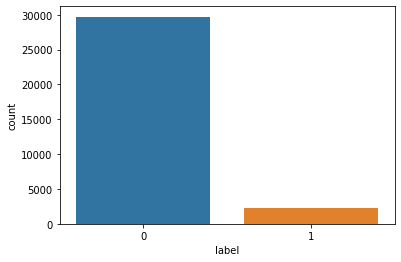

In [62]:
sns.countplot(x='label',data=train)

In [63]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anubhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anubhav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(train)):
  review = re.sub('[^a-zA-Z]',' ',train['tweet'][i])
  review = review.lower()
  review = review.split()
  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)
corpus

['user father dysfunctional selfish drag kid dysfunction run',
 'user user thanks lyft credit use cause offer wheelchair van pdx disapointed getthanked',
 'bihday majesty',
 'model love u take u time ur',
 'factsguide society motivation',
 'huge fan fare big talking leave chaos pay dispute get allshowandnogo',
 'user camping tomorrow user user user user user user user danny',
 'next school year year exam think school exam hate imagine actorslife revolutionschool girl',
 'love land allin cavs champion cleveland clevelandcavaliers',
 'user user welcome gr',
 'ireland consumer price index mom climbed previous may blog silver gold forex',
 'selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking value love',
 'get see daddy today day gettingfed',
 'user cnn call michigan middle school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins',
 'ouch junior angry got junior yugyoem omg',
 'thankf

In [65]:
df = CountVectorizer(max_features=12000)
X = df.fit_transform(corpus).toarray()

In [66]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [67]:
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [69]:
model = MultinomialNB().fit(X_train,y_train)

In [70]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [71]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[5737,  197],
       [ 148,  311]], dtype=int64)

In [72]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9460347254809949

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5934
           1       0.61      0.68      0.64       459

    accuracy                           0.95      6393
   macro avg       0.79      0.82      0.81      6393
weighted avg       0.95      0.95      0.95      6393



In [74]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalize Confusion Matrix")
  else:
    print('Confusion matrix, without Normalization')
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment = "center", color = "white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True values')
  plt.xlabel('Predicted values')

Confusion matrix, without Normalization


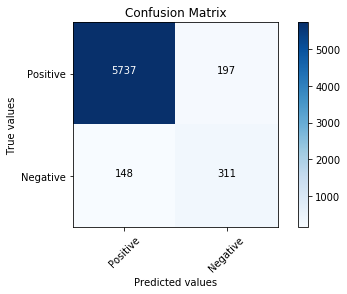

In [75]:
plot_confusion_matrix(cm,classes = ['Positive','Negative'])